# K-Means Clustering: Elbow Method, WCSS, and Performance Metrics

## Elbow Method for Determining the Number of Clusters

The Elbow Method is a technique used to determine the optimal number of clusters in k-means clustering. It involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k) and identifying the point where the rate of decrease sharply changes, forming an "elbow."

### Steps to Implement the Elbow Method

1. **Import Libraries**:
    ```python
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    ```

2. **Generate Data**:
    ```python
    # Example data
    X = np.array([[1, 2], [1, 4], [1, 0], 
                  [4, 2], [4, 4], [4, 0],
                  [10, 2], [10, 4], [10, 0]])
    ```

3. **Calculate WCSS for Different Values of k**:
    ```python
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    ```

4. **Plot the Elbow Graph**:
    ```python
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    ```

## Within-Cluster Sum of Squares (WCSS)

WCSS is the sum of the squared distances between each point and the centroid of its cluster. It measures the compactness of the clusters, with lower values indicating more compact clusters.

### Calculating WCSS
WCSS is calculated during the k-means clustering process. For each value of `k`, the WCSS is computed and plotted to create the elbow graph.

## Performance Metrics for K-Means Clustering

### 1. **Silhouette Score**
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.

    ```python
    from sklearn.metrics import silhouette_score

    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    print(f'Silhouette Score: {silhouette_avg}')
    ```

### 2. **Davies-Bouldin Index**
The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

    ```python
    from sklearn.metrics import davies_bouldin_score

    db_index = davies_bouldin_score(X, labels)
    print(f'Davies-Bouldin Index: {db_index}')
    ```

### 3. **Calinski-Harabasz Index**
The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values indicate better-defined clusters.

    ```python
    from sklearn.metrics import calinski_harabasz_score

    ch_index = calinski_harabasz_score(X, labels)
    print(f'Calinski-Harabasz Index: {ch_index}')
    ```

## Conclusion
The Elbow Method, WCSS, and various performance metrics like the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index are essential tools for evaluating and optimizing k-means clustering. These metrics help in determining the optimal number of clusters and assessing the quality of the clustering results.



### Performance Metrics Clustering-Silhouetter Coefficient

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [3]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
x, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

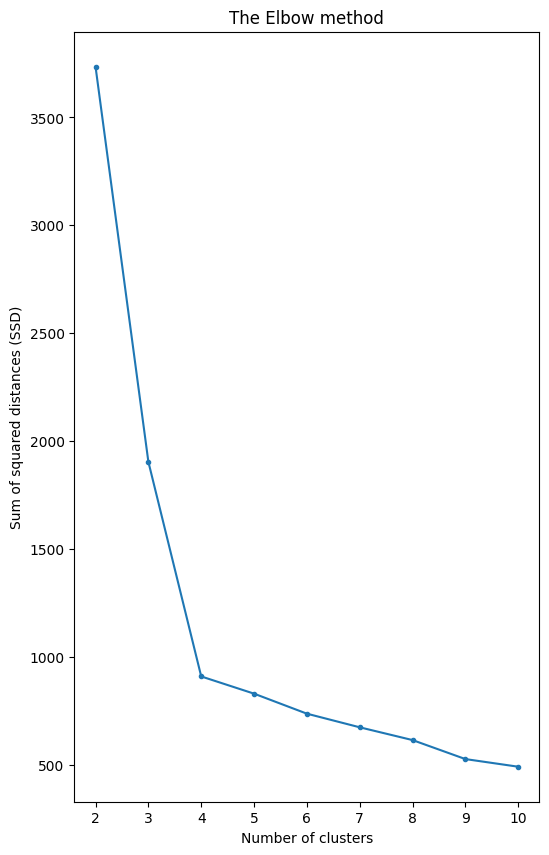

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ssd = [] # sum of squared distances
range_n_clusters = list(range(2,11))

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k , max_iter= 50)
    kmeans.fit(x)
    
    ssd.append(kmeans.inertia_) #inertia is sum of squared distances of samples to their closest cluster center .
    
#plotting ssd for each n_clusters

plt.figure(figsize=(6,10))
plt.plot(range_n_clusters , ssd , marker = '.')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSD)') 
plt.show()   

In [5]:
from sklearn.metrics import silhouette_score , silhouette_samples

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469
For n_clusters = 7 The average silhouette_score is : 0.49731550839901734
For n_clusters = 8 The average silhouette_score is : 0.38073084401226504
For n_clusters = 9 The average silhouette_score is : 0.3839537100348846
For n_clusters = 10 The average silhouette_score is : 0.3912884245125424


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469
For n_clusters = 7 The average silhouette_score is : 0.49731550839901734
For n_clusters = 8 The average silhouette_score is : 0.38073084401226504
For n_clusters = 9 The average silhouette_score is : 0.3839537100348846
For n_clusters = 10 The average silhouette_score is : 0.3912884245125424


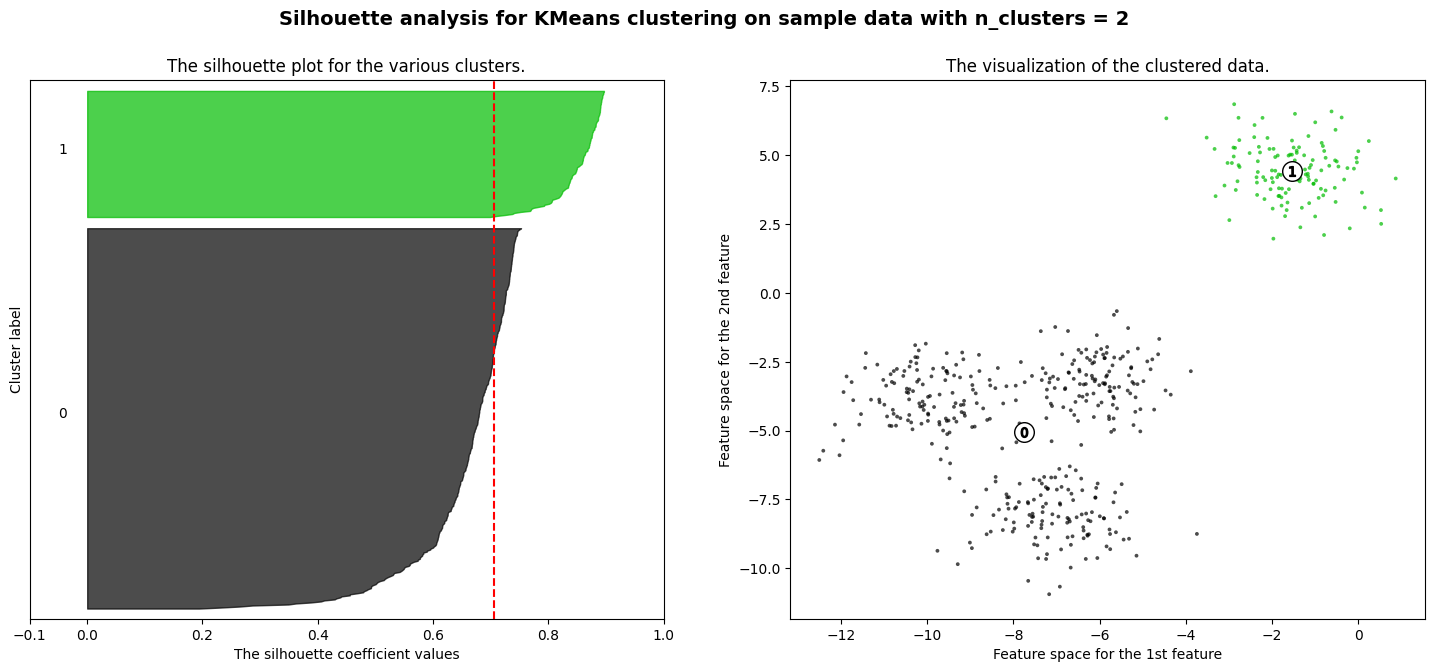

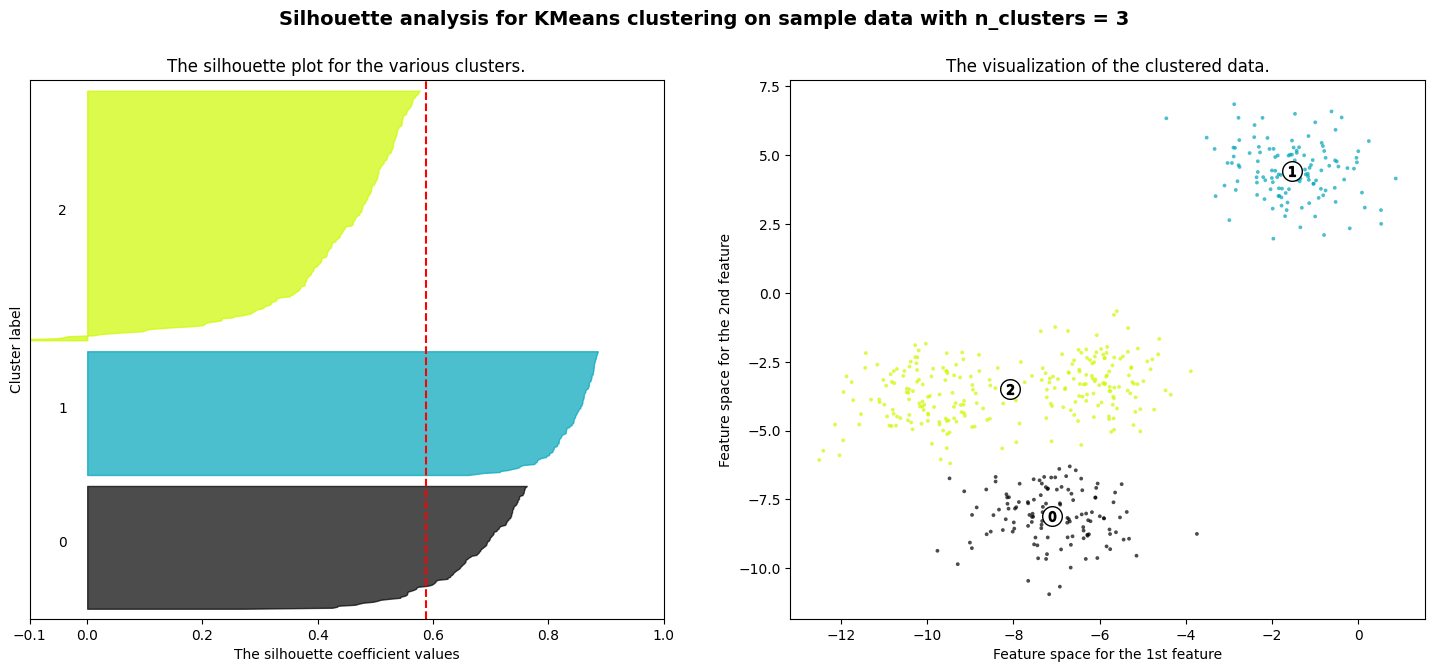

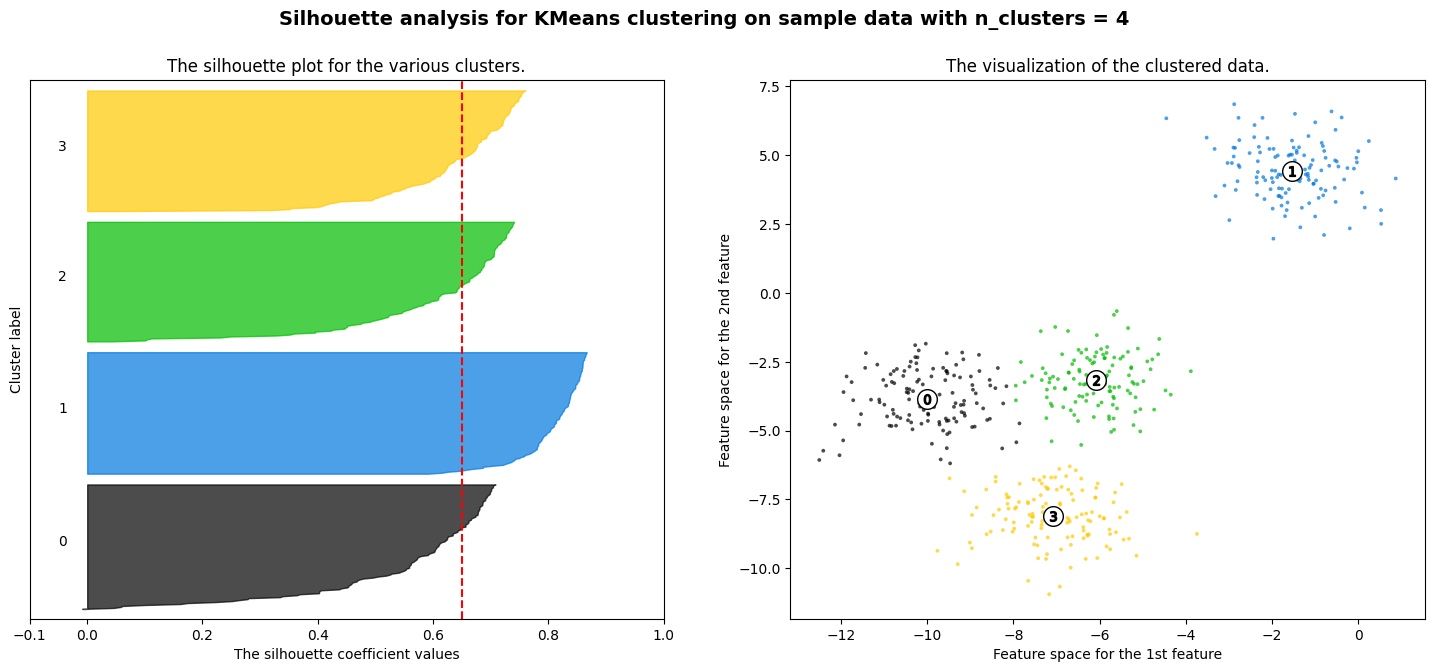

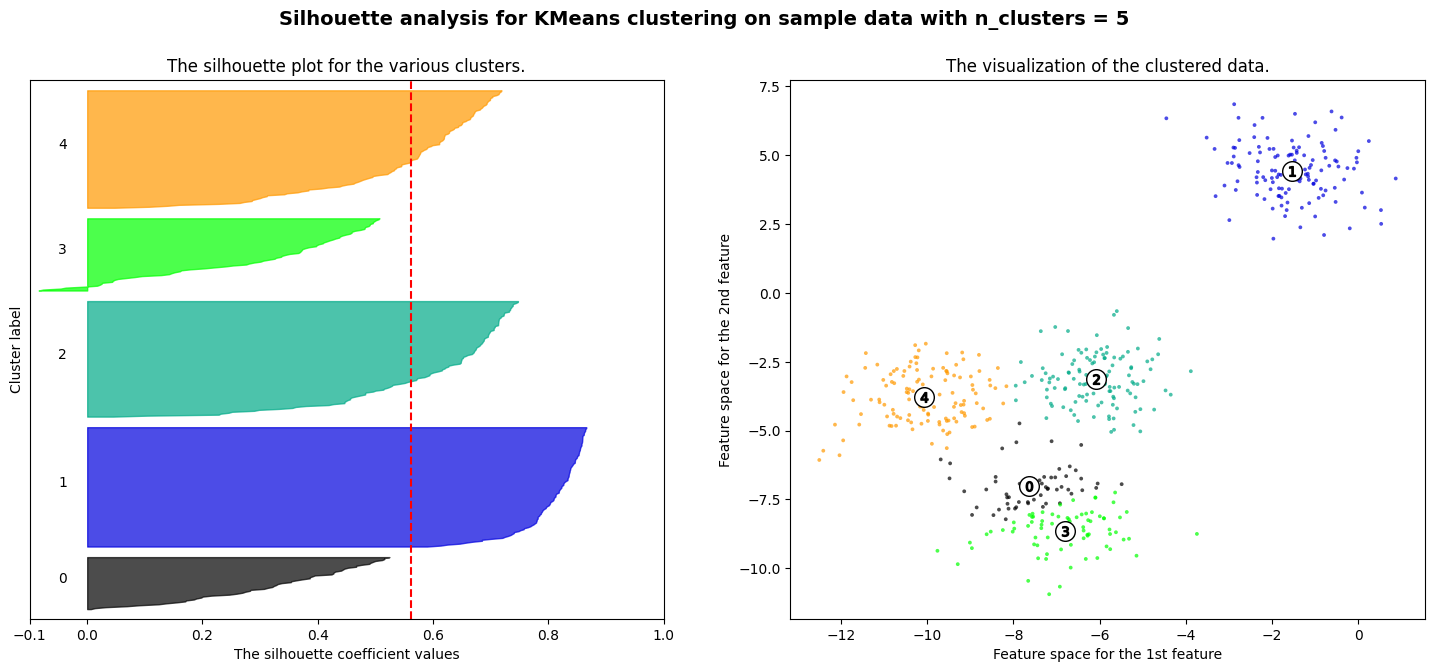

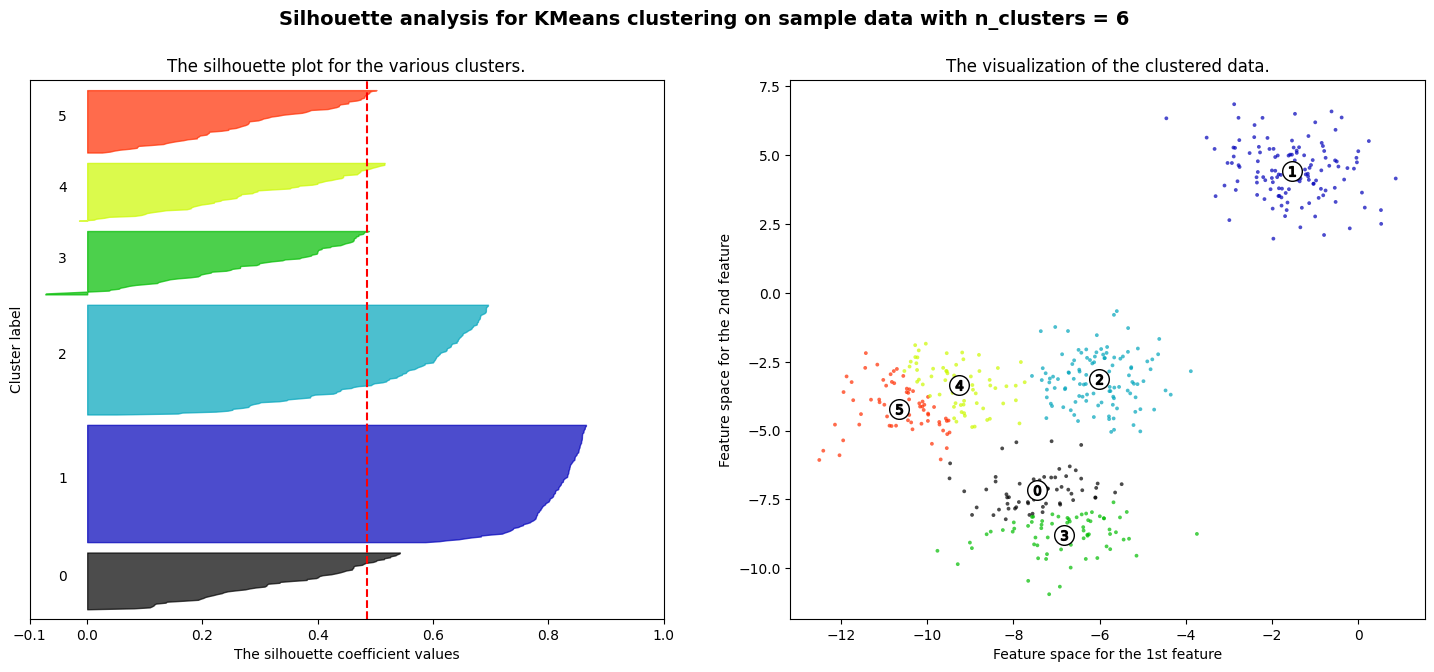

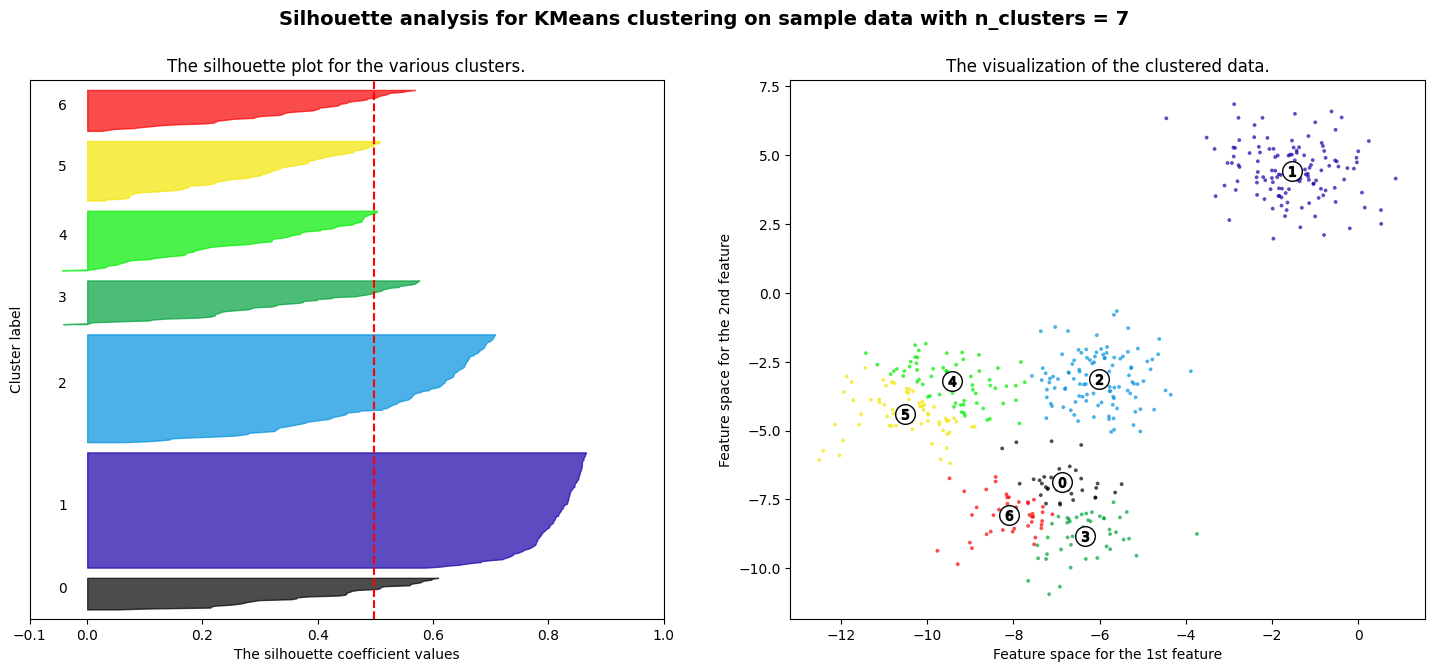

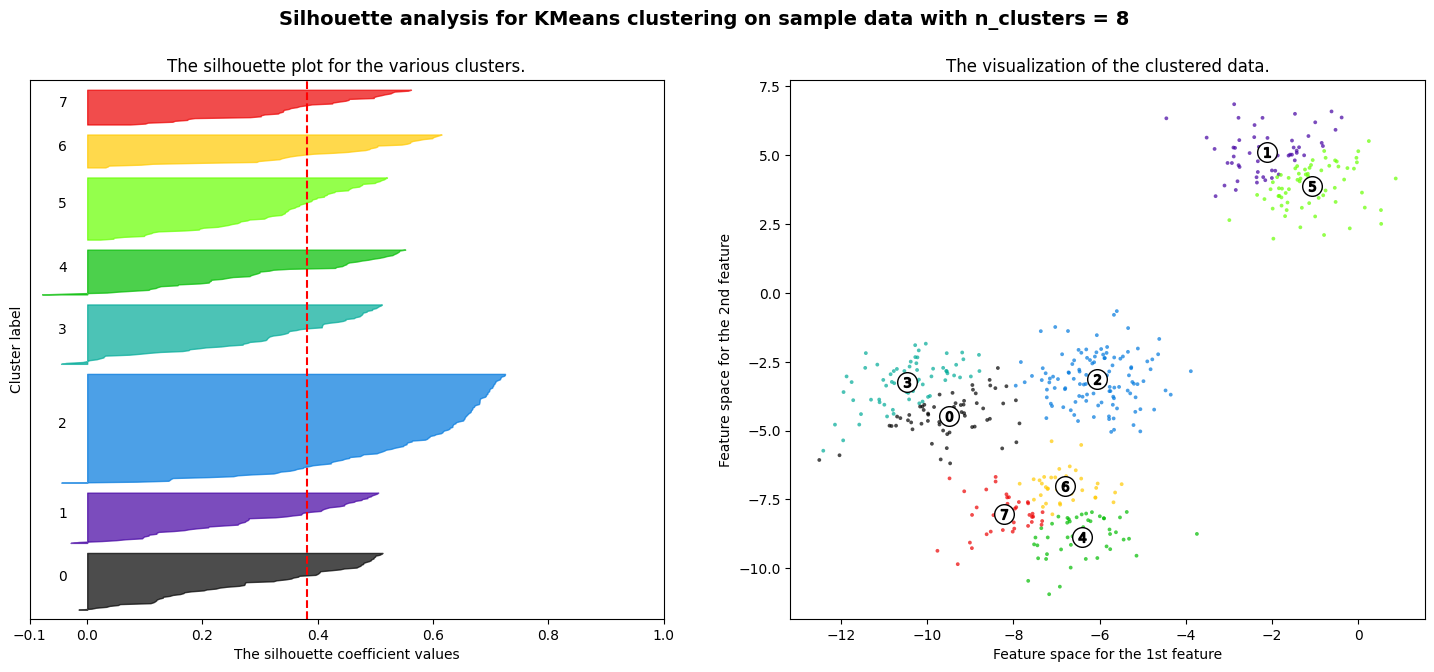

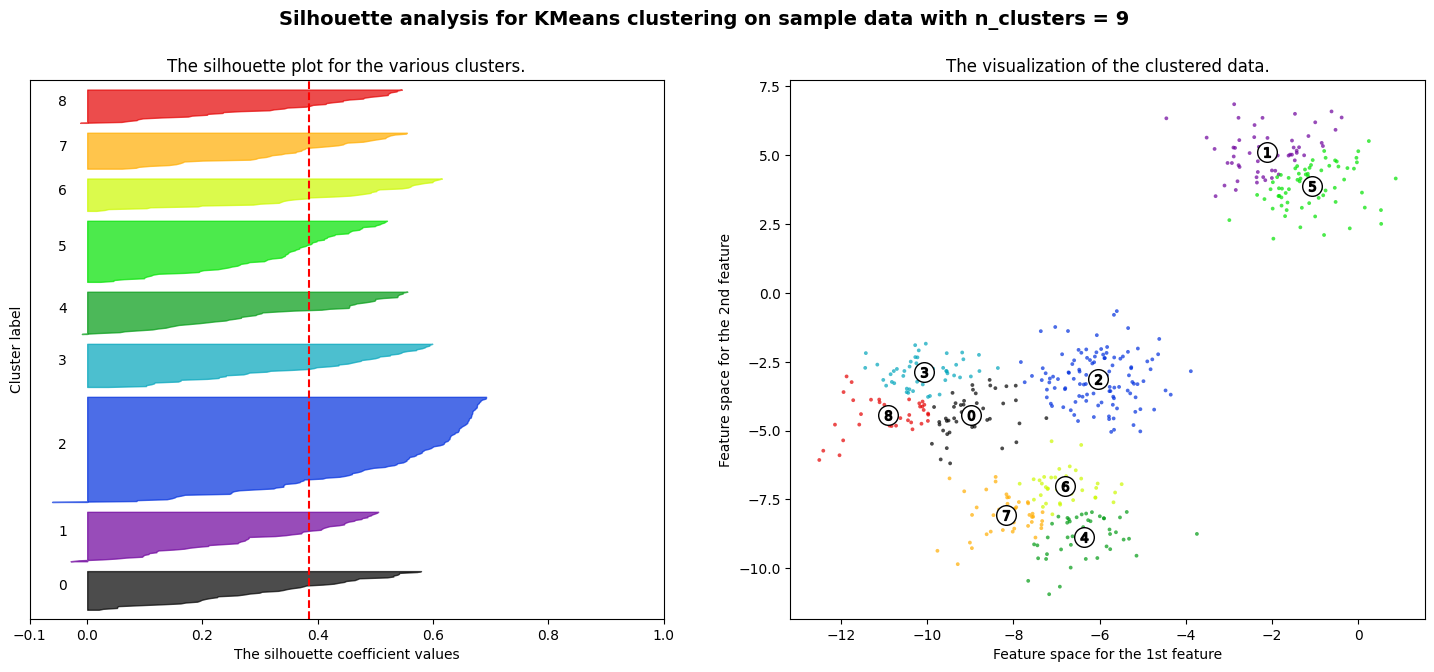

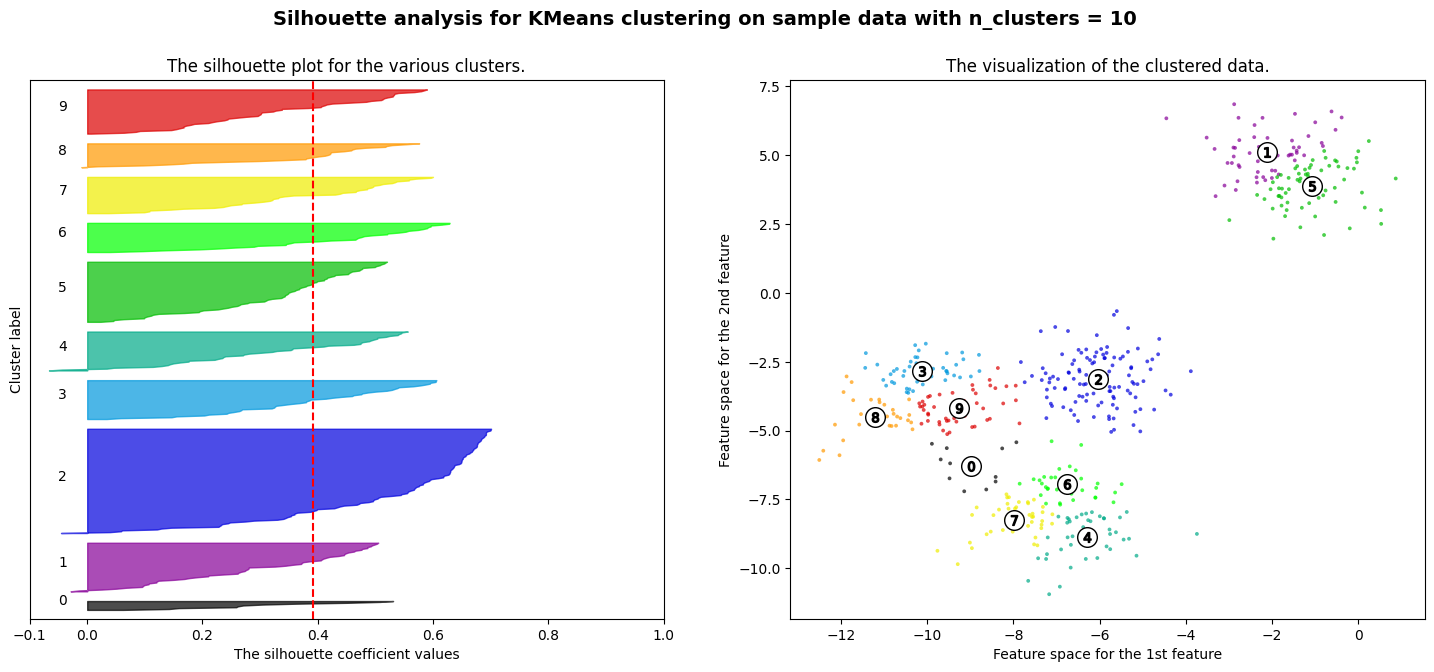

In [6]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

> Check for negative value on graph and discard those cluster 

> So we will have only two cluster k = 2 & k = 4 . with k = 2 having a higher silhouette score
 
> So whenever we have this situation always take bigger k number , it will be able to create a generalised model . so k = 4

In [7]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(x)
print(cluster_labels)

[3 3 0 1 2 1 2 2 2 2 3 3 2 1 2 3 2 3 1 2 0 0 2 1 2 2 1 1 0 2 3 1 2 3 2 3 0
 0 3 0 2 0 1 2 2 3 0 2 1 1 1 0 0 2 3 0 0 0 0 2 1 1 0 2 1 2 3 2 0 0 3 0 2 3
 2 2 3 2 2 0 1 1 0 1 1 0 0 1 0 0 1 3 0 2 1 3 3 2 3 1 1 3 1 0 1 2 2 1 1 0 2
 3 1 0 1 0 1 2 1 2 0 3 3 0 2 0 1 3 3 2 1 0 0 0 0 3 1 2 1 1 2 3 2 1 1 1 2 2
 3 3 0 0 1 3 1 0 0 0 0 0 0 0 0 0 1 3 3 3 2 1 3 0 2 3 1 0 0 0 0 3 2 0 1 3 3
 0 2 3 3 2 1 1 3 3 2 1 2 3 3 1 3 0 1 2 2 3 2 0 3 2 0 2 0 3 2 2 2 1 0 1 2 3
 0 2 0 0 0 1 0 1 3 0 3 0 1 1 0 3 1 3 2 0 3 3 3 3 2 0 3 0 2 1 1 2 2 1 0 2 0
 1 2 1 0 0 1 2 3 3 0 0 0 2 1 1 2 1 0 3 1 3 1 3 3 1 3 1 1 2 0 0 0 2 2 0 3 1
 3 3 3 2 0 2 3 0 3 3 0 3 3 0 1 3 2 2 1 1 0 3 1 1 2 3 1 1 2 0 1 0 2 3 3 1 0
 3 2 1 1 2 2 2 3 2 1 1 0 1 1 1 1 3 3 2 1 0 2 3 1 0 1 2 1 0 2 0 1 2 2 3 1 3
 3 3 3 3 3 0 3 1 3 1 1 0 1 2 0 0 3 1 0 1 2 3 0 0 3 0 0 1 1 3 0 2 1 2 2 3 3
 2 3 0 0 3 0 3 0 1 3 1 0 2 1 0 2 1 3 2 1 1 0 2 0 2 3 1 3 2 1 3 3 3 0 1 2 3
 2 2 0 0 3 2 2 2 2 2 2 3 2 0 3 2 1 2 1 2 0 0 1 1 1 0 2 0 3 0 1 2 3 1 3 1 3
 2 1 1 3 0 2 3 0 0 0 3 2 